# DRY BEAN DATASET: Machine Learning Project- 260794

The aim of this report is to build a Machine Learning Model to carry out prediction on the Dry Beans Dataset that contains images of 13,611 bean grains instances of 7 different types of dry beans. The dataset includes 16 different features, 12 dimensions and 4 shape forms.Several steps would be carried out to achive the best modeling method for prediction.

## 1. IMPORTING  LIBRARIES

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
from scipy.stats import skew

In [2]:
import warnings
warnings.simplefilter('ignore')

## 2. LOADING THE DATASET

In [57]:
# finding the file path
os.path.abspath('Dry_Bean_Dataset.xlsx')

'C:\\Users\\PC\\OneDrive - University of Sussex\\Machine Learning\\ML Project\\Dry_Bean_Dataset.xlsx'

In [4]:
# loading the dataset
df = pd.read_excel('C:\\Users\\PC\\OneDrive - University of Sussex\\Machine Learning\\ML Project\\Dry_Bean_Dataset.xlsx')

In [5]:
# Checking for the number of rows and columns in  the dataset
df.shape

(13611, 17)

In [6]:
# Checking for the first five rows in the dataset
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [7]:
# Checking for the last five rows in the dataset
df.tail()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON

## 3. DATA PREPROCESSING

This involves cleaning, transforming, and organizing raw data before analysis. This step is essential because raw data is often messy, incomplete, and inaccurate, which can lead to inaccurate results or biased models.
Here, I would be checking the dataset for duplicates and null values to ensure that it is clean to carry out the analysis and machine learning methods in order to achieve an acuurate result. 

In [8]:
# Checking for number of duplicated cells in the dataset
df.duplicated().sum()

68

In [9]:
# Viewing the duplicated cells
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13606    False
13607    False
13608    False
13609    False
13610    False
Length: 13611, dtype: bool

In [10]:
# Dropping the duplicates in the dataset
df1= df.drop_duplicates()

In [11]:
# Checking the number of rows and columns in the dataset to be sure that the duplicates have been dropped
df1.shape

(13543, 17)

In [12]:
# Checking to confirm we do not have any duplicates 
df1.duplicated().sum()

0

In [13]:
# Checking for null values
df1.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

From the results gotten above, we can see that the data has zero null for all columns and is completely cleaned as shown above.

## 4. EXPLORATORY DATA ANALYSIS (EDA)

Although carrying out the EDA is not a major concern for this project, I would be inspecting the dataset to understand the data better and use the results to make decisions on the type of machine learning method i think would be suitable.

In [14]:
# Checking for the data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(1

In [15]:
# Checking for the statistical summary
df1.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13543.000000  13543.000000     13543.000000     13543.000000   
mean    53048.460385    854.993406       319.895602       202.365321   
std     29392.438324    214.722684        85.809260        45.051632   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36282.500000    703.230000       253.086806       175.886357   
50%     44580.000000    793.896000       296.404589       192.491117   
75%     61382.000000    977.146500       376.312489       217.245403   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13543.000000  13543.000000   13543.000000   13543.000000  13543.000000   
mean       1.581075      0.750315   53767.986709     253.034094      0.749829   
std        0.245245      0.091858   29844.248525      59.307709      0.048939   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.430662      0.715144   36673.000000     214.933277      0.718735   
50%        1.549860      0.763997   45122.000000     238.245711      0.759903   
75%        1.703916      0.809671   62360.000000     279.560351      0.786849   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13543.000000  13543.000000  13543.000000  13543.000000  13543.000000   
mean       0.987152      0.873671      0.800352      0.006561      0.001719   
std        0.004650      0.059393      0.061464      0.001130      0.000595   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985678      0.833410      0.763228      0.005893      0.001158   
50%        0.988288      0.883490      0.801514      0.006643      0.001700   
75%        0.990019      0.917031      0.834470      0.007270      0.002173   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13543.000000  13543.000000  
mean       0.644341      0.995078  
std        0.098653      0.004347  
min        0.410339      0.947687  
25%        0.582517      0.993720  
50%        0.642424      0.996393  
75%        0.696341      0.997891  
max        0.974767      0.999733

In [16]:
#Defining a function to plot a bar chart
def plot_barchart(x, y, title, xlable=None, ylable=None):
    plt.figure(figsize=(15, 5))
    sns.barplot(x, y)
    plt.title(title, fontsize=18)
    plt.xlabel(xlable, fontsize=14)
    plt.ylabel(ylable, fontsize=14)
    plt.xticks(rotation=65)
    plt.show()

In [17]:
# Defining a function to plot the Percentage on bar chart
def plot_percentage(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.title(title, fontsize=18)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="black", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    plt.show()

Total unique values are:  7 


Category	Value

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


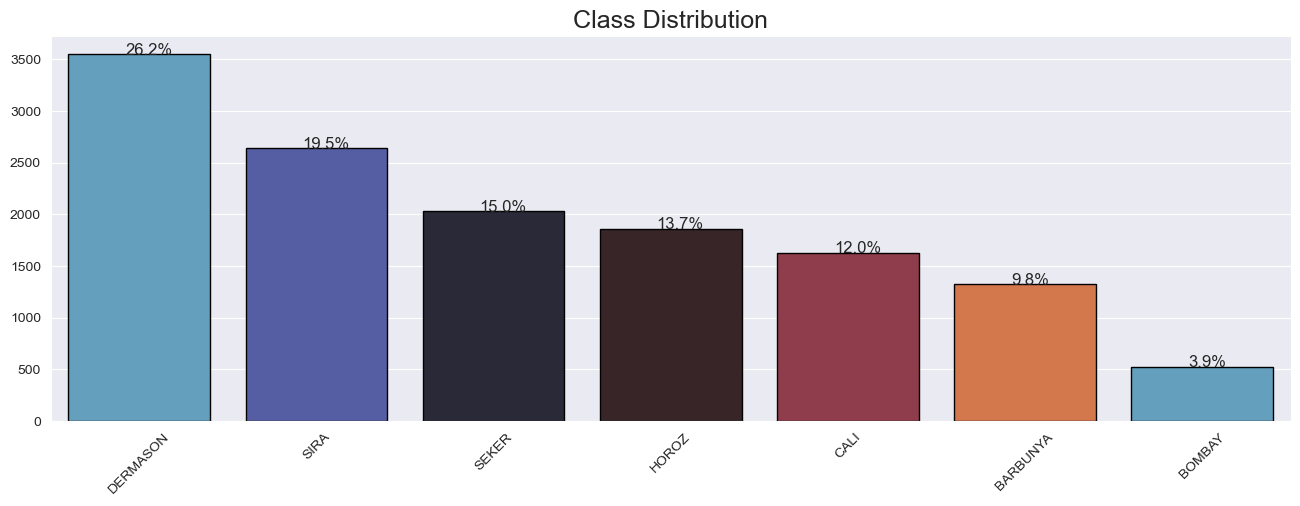

In [18]:
#To check for the distribution of the classes in the dataset
plot_percentage(df1.Class, "Class Distribution")

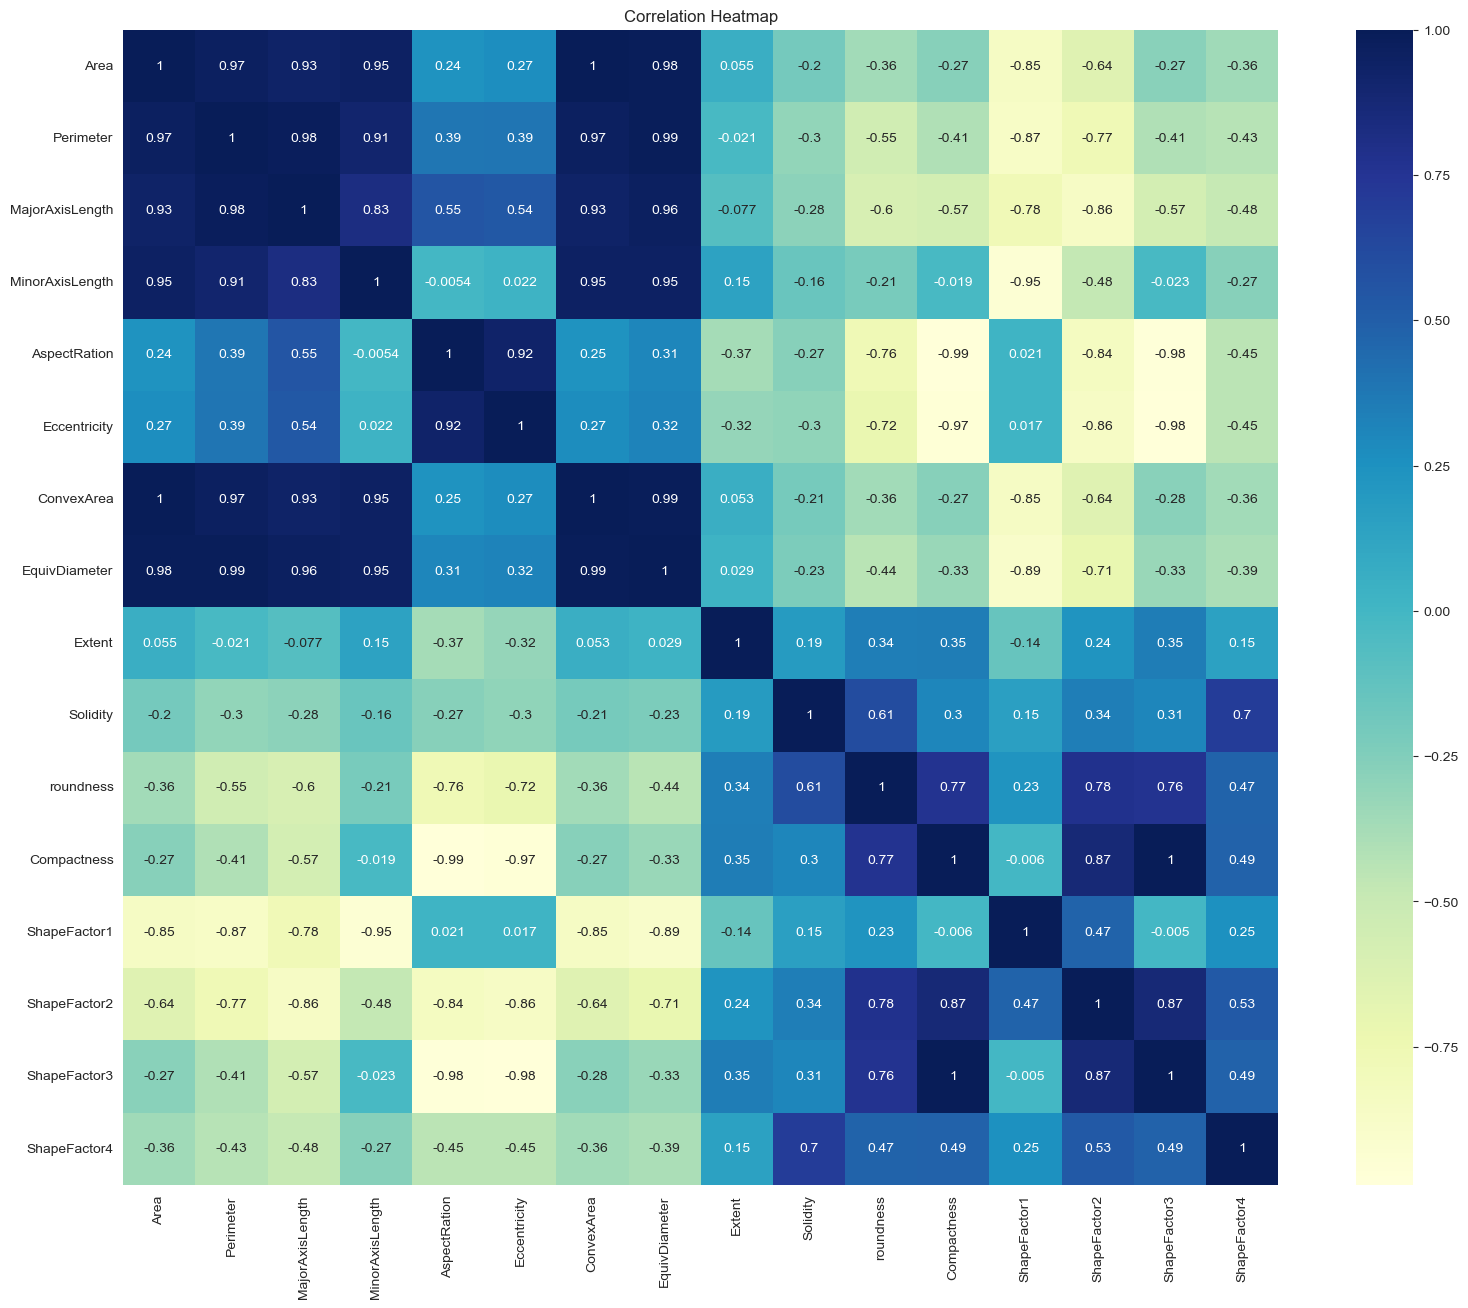

In [19]:
# Plotting a heatmap to show the correlation between the variables
corr = df1.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, square=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

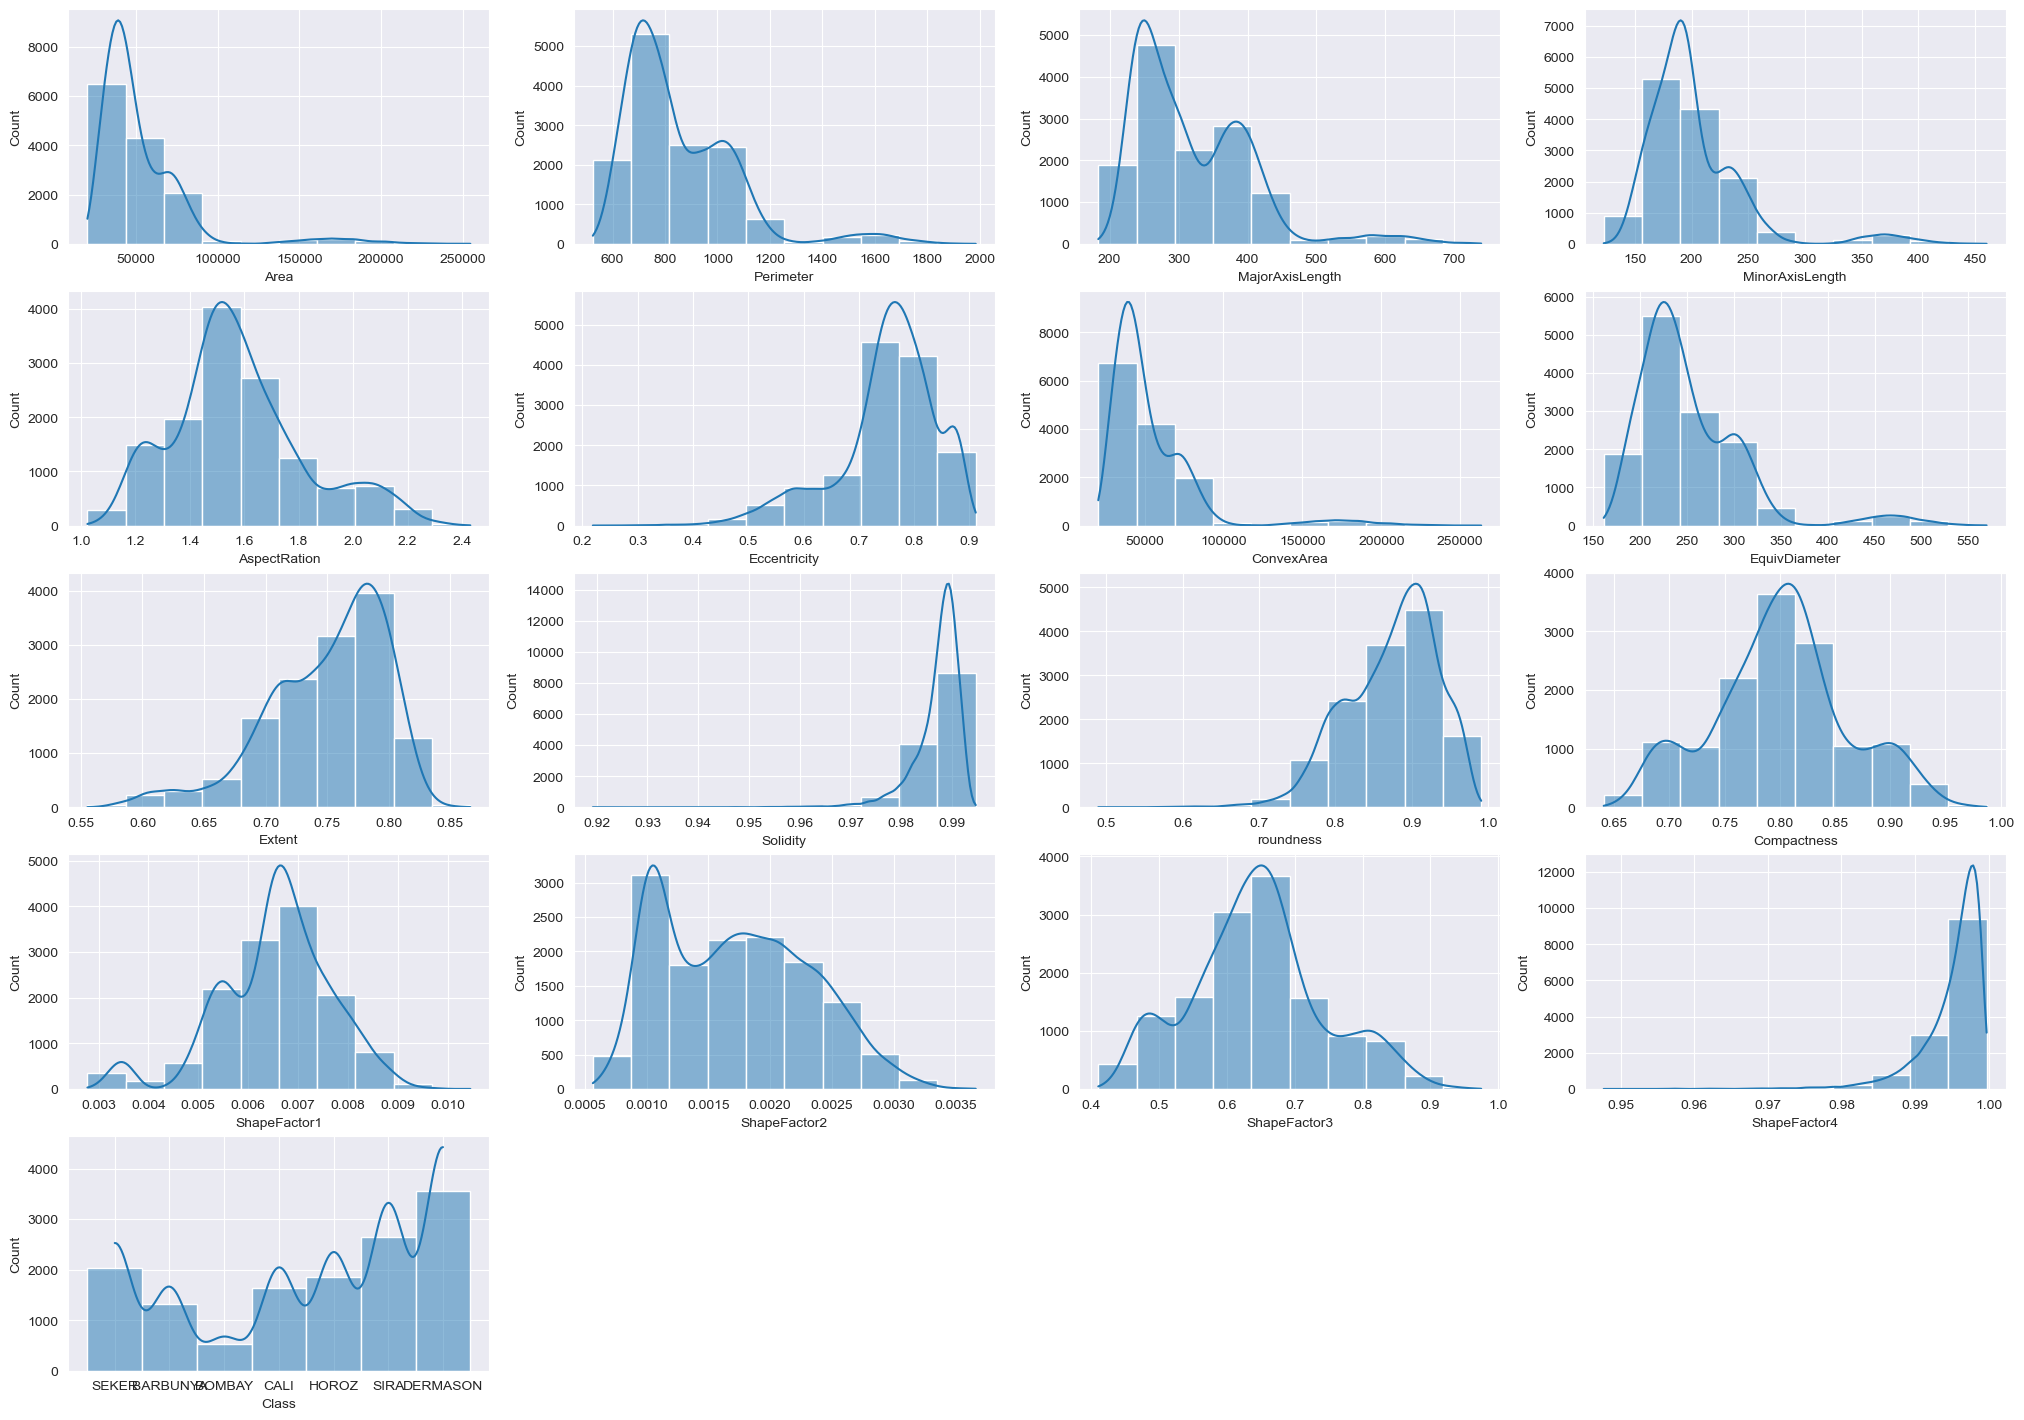

In [20]:
# Plotting a histplot to see the skewness of the features in the dataset
plt.figure(figsize=(25, 25))
for i, col in enumerate(list(df1.columns)):
    plt.subplot(7, 4, i+1)
    sns.histplot(df1[col], kde=True, bins=10)


In [21]:
# Defining a function to check for the skewness in the data
def check_skewness(data):
    # Compute the skewness of each numerical feature in the dataset
    skewness = data.select_dtypes(include=['float64', 'int64']).apply(lambda x: skew(x))
    
    # Get features with skewness above the threshold of 0.5
    skewed_feats = skewness[abs(skewness) > 0.5]
    
    # Print the skewed features and their corresponding skewness values
    if skewed_feats.shape[0] == 0:
        print("No features have skewness above 0.5")
    else:
        print("Skewed features:\n", skewed_feats.sort_values(ascending=False))
       

In [22]:
# Viewing the level of skewness for each feature
check_skewness(df1)

Skewed features:
 Area               2.946809
ConvexArea         2.935777
MinorAxisLength    2.231766
EquivDiameter      1.947087
Perimeter          1.627838
MajorAxisLength    1.365662
AspectRation       0.588979
ShapeFactor1      -0.530368
roundness         -0.648654
Extent            -0.895556
Eccentricity      -1.064814
Solidity          -2.546595
ShapeFactor4      -2.759819
dtype: float64


## 5.  MACHINE LEARNING MODELLING

In carrying out the modelling,  several steps would be done to help improve and optimize the accuracy of the model. We would be Resampling the data, Splitting the dataset, Scaling the data, Using  hyperparameter tuning to optimize the model parameters before finally feeding the data into the model.

## 5.1 Resampling the Dataset

Data imbalance is an important factor to consider in building a predictive model. From the result gotten above, it shows the large imbalance of the classes. Therefore, handling this data imbalance would enable one to build a predictive model that performs well on all classes. 

There are several methods that can be used to handle data imbalance however,  i would  be using $Resampling$ for this project. There are two methods in resampling which is the Undersampling and the Oversampling. For this work, I would be using the SMOTE method for oversampling to handle the data imbalance.

In [23]:
# Counting the distribution of the bean grains in each class
class_counts = df1['Class'].value_counts()

# Print the class counts
print(class_counts)

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


In [24]:
# Creating a copy of the dataset to be used in modeling the unscaled data
sampling_data = df1.copy()

In [25]:
# Checking the version of the imbearn installed to confirm proper installation
import imblearn
print(imblearn.__version__)

0.10.1


In [26]:
# Using the SMOTE method to carryout oversampling
from imblearn.over_sampling import SMOTE

# Separate the feature matrix and target vector (i.e the label)
X = sampling_data.drop('Class', axis=1)
y = sampling_data['Class']

# Create the SMOTE object
smote = SMOTE(random_state=42)

# Resample the dataset
feature, label = smote.fit_resample(X, y)

In [27]:
# Counting the number of instances in each class before and after resampling
print('Class distribution before resampling:')
print(y.value_counts())

print('Class distribution after resampling:')
print(pd.Series(label).value_counts())

Class distribution before resampling:
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64
Class distribution after resampling:
SEKER       3546
BARBUNYA    3546
BOMBAY      3546
CALI        3546
HOROZ       3546
SIRA        3546
DERMASON    3546
Name: Class, dtype: int64


## 5.2 Data Splitting

In carrying out the prediction, I would be splitting the dataset into training and test data in the ratio 80:20 to train the models. Furthermore, The train set would be divided further in  the ratio 90:10 to get the train set and validation set

In [28]:
# Spliting data into train and test data with the training size as 80% and testing size as 20% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=42)

In [29]:
# To check for the first 5 X_train data
X_train[:5]

Area    Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
7306    67498  1030.025000       403.200822       213.958246      1.884484   
17399  168950  1571.154168       595.525288       365.483231      1.631364   
14093   74924  1111.121251       392.172871       244.310568      1.606073   
22291   41243   792.457323       325.905272       161.813377      2.015156   
16348  157456  1509.783961       567.284032       357.012851      1.589440   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
7306       0.847591       68502     293.157164  0.759471  0.985343   0.799476   
17399      0.787903      171409     463.803619  0.769728  0.985657   0.860063   
14093      0.781551       76160     308.862831  0.763391  0.983763   0.762777   
22291      0.867683       41726     229.156115  0.775507  0.988423   0.825334   
16348      0.776671      159939     447.749812  0.796681  0.984482   0.868147   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
7306      0.727075      0.005974      0.001030      0.528638      0.996209  
17399     0.779250      0.003525      0.000803      0.607568      0.988923  
14093     0.787778      0.005234      0.001244      0.620759      0.995925  
22291     0.703303      0.007902      0.001193      0.494754      0.996025  
16348     0.789441      0.003603      0.000864      0.623349      0.990053

In [30]:
# To check for the first 5 y_train data
y_train[:5]

7306        HOROZ
17399      BOMBAY
14093    BARBUNYA
22291       HOROZ
16348      BOMBAY
Name: Class, dtype: object

In [31]:
# To check for the redistribution of the y_train after splitting to be sure it is still balanced with oversampling
print(y_train.value_counts())

SEKER       2855
SIRA        2849
HOROZ       2843
BOMBAY      2831
DERMASON    2831
BARBUNYA    2829
CALI        2819
Name: Class, dtype: int64


In [32]:
# To check for the redistribution of the y_test after splitting to be sure it is still balanced with oversampling
print(y_test.value_counts())

CALI        727
BARBUNYA    717
DERMASON    715
BOMBAY      715
HOROZ       703
SIRA        697
SEKER       691
Name: Class, dtype: int64


In [33]:
# Split X_train and y_train into 90% train and 10% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Print the shapes of the resulting datasets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)

X_train shape: (17871, 16)
y_train shape: (17871,)
X_val shape: (1986, 16)
y_val shape: (1986,)


## 5.3 Scaling the Data

Scaling is an important preprocessing step used in carrying out many machine learning algorithms as it helps to ensure all the features contribute equally to the analysis. Features  with larger values may dominate the analysis and lead to biased results therefore scaling helps to rescale the numerical feature so they are all within the same range. It also helps with the model interpretation and visualization. By scaling them  to the same range, it makes it easier to interpret the data evenly. 

From the dataset, we can see that the numericall values are not within the same range, hence the reason for scaling the data in other to optimize the performance of the model.



In [34]:
#  Using StandardScaler to carryout scaling on the dataset
from sklearn.preprocessing import StandardScaler

# Fit the scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use the scaler to transform the validation and test data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [35]:
# To Check for the minimum and maximum values of each feature in X_train_scaled after scaling
print('Minimum values:', np.min(X_train_scaled, axis=0))
print('Maximum values:', np.max(X_train_scaled, axis=0))

Minimum values: [ -1.07342264  -1.50587029  -1.55096486  -1.46954977  -2.36085597
  -5.94502726  -1.07274049  -1.46509711  -4.19722497 -14.5100857
  -5.24834519  -2.47014184  -2.36763406  -1.58129617  -2.25840132
 -10.73574243]
Maximum values: [4.02199274 3.43734236 3.28363236 3.49649782 3.24879507 1.67893637
 4.132596   3.34176626 2.26165562 1.68341496 2.11944745 3.14947346
 2.79193402 3.44652155 3.46236889 1.19624443]


## 5.4 Hyperparameter Tuning (Optimization)

In [36]:
# Defining a function to assess the model (For validation set) 
def assess_val(model, X_train=X_train_scaled, X_val=X_val_scaled, y_train=y_train, y_val=y_val):
    from sklearn import metrics
    from sklearn.metrics import classification_report
    # To make predictions from model
    y_predict = model.predict(X_val)

    # Creating confusion metric of results
    cm = metrics.confusion_matrix(y_val, y_predict)

    # printing all results
    print(f"The Training set Accuracy of the Model is {model.score(X_train, y_train)}")
    print(f"The Validation set Accuracy of the Model is {model.score(X_val_scaled, y_val)}")
    print(f"The Model classification report is {classification_report(y_val,y_predict)}")

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, cmap="coolwarm")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

In [37]:
# Using GridSearchCV to carryout the hyperparameter tuning for logistic regression  parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

params = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1],
    "max_iter": [100, 200],
    "solver": ["liblinear","lbfgs"]
}

grid = GridSearchCV(LogisticRegression(), params, n_jobs=-1, cv=3)

# fit the grid search object to the training data
grid.fit(X_train_scaled, y_train)

# print the best parameters and its result
best_params = grid.best_params_
best_score = grid.cv_results_['mean_test_score'][grid.best_index_]
print("* Best parameters: ", best_params)
print("  Accuracy: ", best_score)
print("  F1-score: ", f1_score(y_test, grid.predict(X_test_scaled), average='weighted'))

# print the accuracy and F1-score for each parameter combination
print("\nResults:")
for i, score in enumerate(grid.cv_results_['mean_test_score']):
    if grid.cv_results_['params'][i] == best_params:
        continue
    print(f"Params: {grid.cv_results_['params'][i]} \nAccuracy: {score} \nF1-score: {f1_score(y_test, grid.predict(X_test_scaled), average='weighted')}\n")


* Best parameters:  {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
  Accuracy:  0.9429802473280734
  F1-score:  0.9441789932717451

Results:
Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'} 
Accuracy: 0.9228918359353142 
F1-score: 0.9441789932717451

Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'lbfgs'} 
Accuracy: nan 
F1-score: 0.9441789932717451

Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'} 
Accuracy: 0.9152817413686979 
F1-score: 0.9441789932717451

Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'} 
Accuracy: 0.9377203290246768 
F1-score: 0.9441789932717451

Params: {'C': 0.01, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'} 
Accuracy: 0.9230037490907056 
F1-score: 0.9441789932717451

Params: {'C': 0.01, 'max_iter': 200, 'penalty': 'l1', 'solver': 'lbfgs'} 
Accuracy: nan 
F1-score: 0.9441789932717451

Params: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'sol

## 5.5 LOGISTIC REGRESSION MODEL

### LOGISTIC REGRESSION FOR VALIDATION  SET (SCALED  DATA)

In [38]:
# To feed the training data to the model.
model = LogisticRegression(C=1, max_iter=200, penalty="l2", solver="lbfgs")
model.fit(X_train_scaled, y_train)


LogisticRegression(C=1, max_iter=200)

The Training set Accuracy of the Model is 0.9430921604834648
The Validation set Accuracy of the Model is 0.9491440080563948
The Model classification report is               precision    recall  f1-score   support

    BARBUNYA       0.97      0.94      0.96       287
      BOMBAY       1.00      1.00      1.00       294
        CALI       0.94      0.96      0.95       288
    DERMASON       0.92      0.92      0.92       284
       HOROZ       0.98      0.96      0.97       302
       SEKER       0.96      0.97      0.96       269
        SIRA       0.87      0.89      0.88       262

    accuracy                           0.95      1986
   macro avg       0.95      0.95      0.95      1986
weighted avg       0.95      0.95      0.95      1986



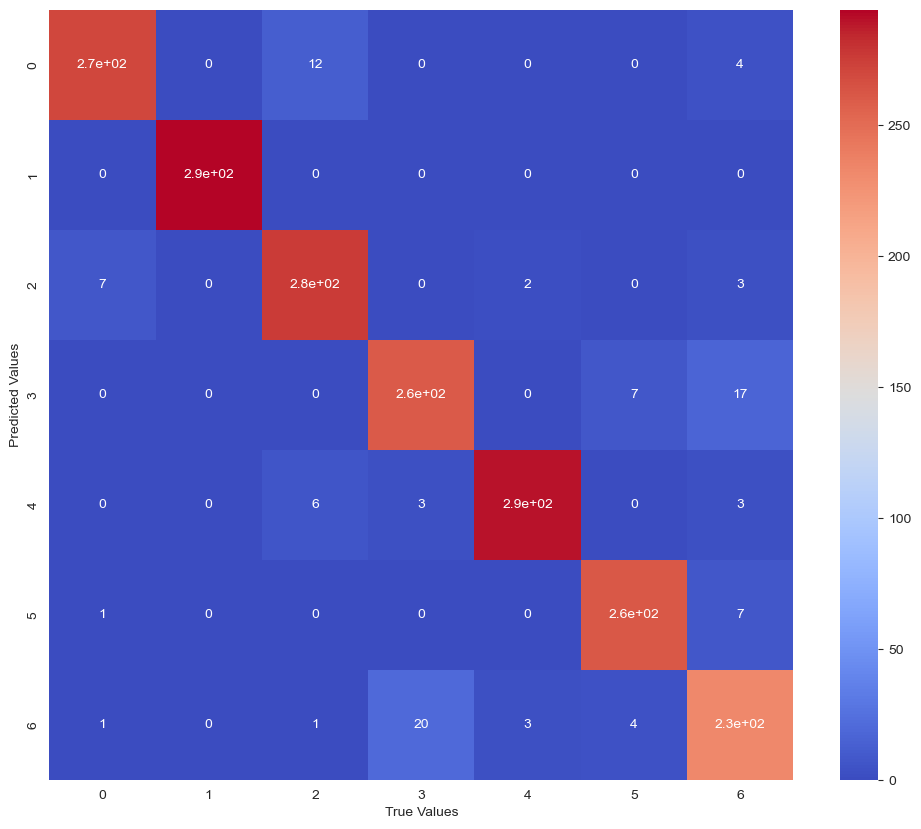

In [39]:
# Evaluating the model performance on the validation set
assess_val(model)

### LOGISTIC REGRESSION  FOR TEST SET (SCALED  DATA)

In [40]:
# Defining a function to assess the model (For test set) 
def assess_test(model, X_train=X_train_scaled, X_test=X_test_scaled, y_train=y_train, y_test=y_test):
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    # To make predictions from model
    y_predict = model.predict(X_test)

    # Creating confusion metric of results
    cm = confusion_matrix(y_test, y_predict)

    # printing all results
    print(f"The Training set Accuracy of the Model is {model.score(X_train, y_train)}")
    print(f"The Testing set Accuracy of the Model is {model.score(X_test, y_test)}")
    print(f"The Model classification report is {classification_report(y_test,y_predict)}")

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, cmap="coolwarm")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

The Training set Accuracy of the Model is 0.9430921604834648
The Testing set Accuracy of the Model is 0.9440080563947634
The Model classification report is               precision    recall  f1-score   support

    BARBUNYA       0.96      0.94      0.95       717
      BOMBAY       1.00      1.00      1.00       715
        CALI       0.95      0.96      0.95       727
    DERMASON       0.91      0.90      0.91       715
       HOROZ       0.97      0.96      0.96       703
       SEKER       0.96      0.96      0.96       691
        SIRA       0.86      0.90      0.88       697

    accuracy                           0.94      4965
   macro avg       0.94      0.94      0.94      4965
weighted avg       0.94      0.94      0.94      4965



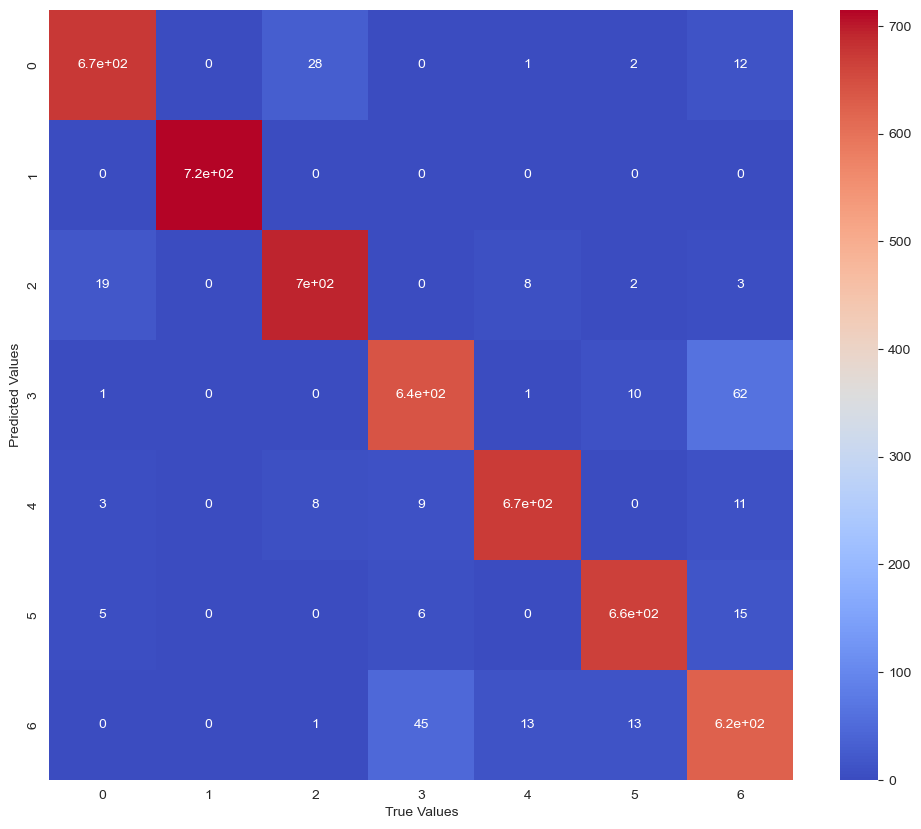

In [41]:
# Evaluating the model performance on the test set
assess_test(model)

## 6. ADDITIONAL MODEL (AUTOMATIC DETECTION)- RANDOM FOREST CLASSIFIER (RFC)

## 6.1 Hyperparameter Tuning

In [42]:
# Using GridSearchCV to carryout the hyperparameter tuning for RFC parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

# Create a Random Forest classifier object
rfc = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object to search for the best parameters
grid = GridSearchCV(rfc, params, n_jobs=-1, cv=3)

# Fit the GridSearchCV object to the training data
grid.fit(X_train_scaled, y_train)

# Print the best parameters and its result
best_params = grid.best_params_
best_score = grid.cv_results_['mean_test_score'][grid.best_index_]
print("* Best parameters: ", best_params)
print("  Accuracy: ", best_score)
print("  F1-score: ", f1_score(y_test, grid.predict(X_test_scaled), average='weighted'))

# Print the accuracy and F1-score for each parameter combination
print("\nResults:")
for i, score in enumerate(grid.cv_results_['mean_test_score']):
    if grid.cv_results_['params'][i] == best_params:
        continue
    print(f"Params: {grid.cv_results_['params'][i]} \nAccuracy: {score} \nF1-score: {f1_score(y_test, grid.predict(X_test_scaled), average='weighted')}\n")


* Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
  Accuracy:  0.9499188629623413
  F1-score:  0.9521183613221789

Results:
Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50} 
Accuracy: 0.9490235577192099 
F1-score: 0.9521183613221789

Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} 
Accuracy: 0.949583123496167 
F1-score: 0.9521183613221789

Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50} 
Accuracy: 0.9490235577192099 
F1-score: 0.9521183613221789

Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100} 
Accuracy: 0.9487437748307314 
F1-score: 0.9521183613221789

Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200} 
Accuracy: 0.9487437748307314 
F1-score: 0.9521183613221789

Params: {'max_depth': None, 'min_sam

### RANDOM FOREST CLASSIFIER MODEL FOR VALIDATION SET (SCALED DATA)

In [43]:
# To feed the training data to the model.
model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200)

The Training set Accuracy of the Model is 1.0
The Validation set Accuracy of the Model is 0.9506545820745217
The Model classification report is               precision    recall  f1-score   support

    BARBUNYA       0.96      0.96      0.96       287
      BOMBAY       1.00      1.00      1.00       294
        CALI       0.96      0.95      0.96       288
    DERMASON       0.91      0.92      0.92       284
       HOROZ       0.97      0.96      0.97       302
       SEKER       0.96      0.98      0.97       269
        SIRA       0.88      0.87      0.88       262

    accuracy                           0.95      1986
   macro avg       0.95      0.95      0.95      1986
weighted avg       0.95      0.95      0.95      1986



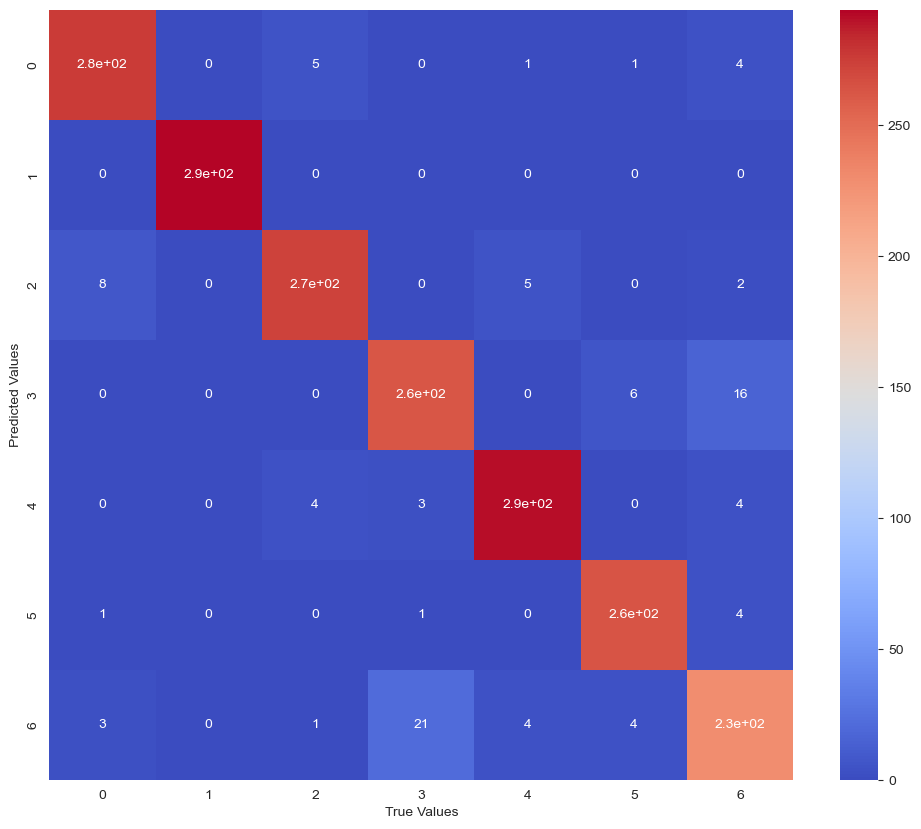

In [44]:
# Evaluating the model performance on the validation set
assess_val(model)

### RANDOM FOREST CLASSIFIER MODEL FOR TEST SET (SCALED DATA)

The Training set Accuracy of the Model is 1.0
The Testing set Accuracy of the Model is 0.9536757301107754
The Model classification report is               precision    recall  f1-score   support

    BARBUNYA       0.97      0.96      0.96       717
      BOMBAY       1.00      1.00      1.00       715
        CALI       0.97      0.96      0.96       727
    DERMASON       0.91      0.93      0.92       715
       HOROZ       0.97      0.96      0.97       703
       SEKER       0.97      0.98      0.97       691
        SIRA       0.90      0.90      0.90       697

    accuracy                           0.95      4965
   macro avg       0.95      0.95      0.95      4965
weighted avg       0.95      0.95      0.95      4965



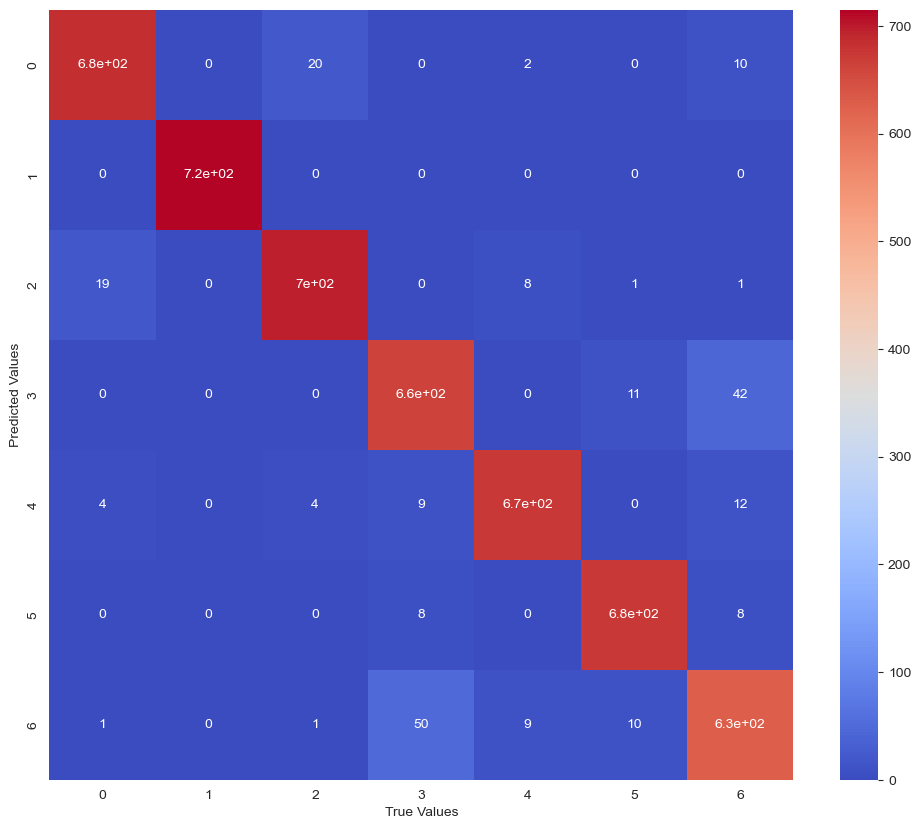

In [45]:
assess_test(model)

## 7. CLASSIFICATION OUTPUT

In [46]:
# Predicting the target variabe for the test dataset 
y_predict = model.predict(X_test_scaled)
# Assigning the predicted variable to y_predict
y_predict

array(['HOROZ', 'DERMASON', 'SIRA', ..., 'BOMBAY', 'BOMBAY', 'CALI'],
      dtype=object)

In [47]:
# To get the output of the predicted classes and their corresponding IDs in a csv file
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
Data_Output = pd.DataFrame({'ID': X_test_df.index, 'Class': y_predict})
Data_Output.to_csv('Data_Output.csv', index=False)

In [86]:
Data_Output

ID     Class
0      5716     HOROZ
1     11812  DERMASON
2      8487      SIRA
3     19893      CALI
4     20554      CALI
...     ...       ...
4960    631     SEKER
4961  18828      CALI
4962  17276    BOMBAY
4963  15974    BOMBAY
4964   4767      CALI

[4965 rows x 2 columns]

In [68]:
# Downloading the dataset
from google.colab import files
files.download('Data_Output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 8. MACHINE  LEARNING MODELS ON UNSCALED DATA

To find out the effect of scaling on the dataset, i would be modelling the data with the unscaled dataset using Logistic regression and Random Forest Classifier (RFC).

## 8.1 Hyperparameter Tuning

In [48]:
# Defining a function to assess the model (For Validation set) 
def evaluate_val(model, X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val):
    from sklearn import metrics
    from sklearn.metrics import classification_report
    # To make predictions from model
    y_predict = model.predict(X_val)

    # Creating confusion metric of results
    cm = metrics.confusion_matrix(y_val, y_predict)

    # printing all results
    print(f"The Training set Accuracy of the Model is {model.score(X_train, y_train)}")
    print(f"The Validation set Accuracy of the Model is {model.score(X_val, y_val)}")
    print(f"The Model classification report is {classification_report(y_val,y_predict)}")

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, cmap="coolwarm")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

In [49]:
# Using GridSearchCV to carryout the hyperparameter tuning for logistic regression  parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

params = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1],
    "max_iter": [100, 200],
    "solver": ["liblinear","lbfgs"]
}

grid = GridSearchCV(LogisticRegression(), params, n_jobs=-1, cv=3)

# fit the grid search object to the training data
grid.fit(X_train, y_train)

# print the best parameters and its result
best_params = grid.best_params_
best_score = grid.cv_results_['mean_test_score'][grid.best_index_]
print("* Best parameters: ", best_params)
print("  Accuracy: ", best_score)
print("  F1-score: ", f1_score(y_test, grid.predict(X_test), average='weighted'))

# print the accuracy and F1-score for each parameter combination
print("\nResults:")
for i, score in enumerate(grid.cv_results_['mean_test_score']):
    if grid.cv_results_['params'][i] == best_params:
        continue
    print(f"Params: {grid.cv_results_['params'][i]} \nAccuracy: {score} \nF1-score: {f1_score(y_test, grid.predict(X_test), average='weighted')}\n")


* Best parameters:  {'C': 1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
  Accuracy:  0.9327961501874545
  F1-score:  0.932196906580399

Results:
Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'} 
Accuracy: 0.9161770466118292 
F1-score: 0.932196906580399

Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'lbfgs'} 
Accuracy: nan 
F1-score: 0.932196906580399

Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'} 
Accuracy: 0.9035868166302948 
F1-score: 0.932196906580399

Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'} 
Accuracy: 0.7304571652397739 
F1-score: 0.932196906580399

Params: {'C': 0.01, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'} 
Accuracy: 0.9185831794527447 
F1-score: 0.932196906580399

Params: {'C': 0.01, 'max_iter': 200, 'penalty': 'l1', 'solver': 'lbfgs'} 
Accuracy: nan 
F1-score: 0.932196906580399

Params: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver

### LOGISTIC REGRESSION  FOR VALIDATION SET (UNSCALED  DATA)

In [50]:
# To feed the training data to the model.
model = LogisticRegression(C=1, max_iter=200, penalty="l1", solver="liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200, penalty='l1', solver='liblinear')

The Training set Accuracy of the Model is 0.9317329752112361
The Validation set Accuracy of the Model is 0.9340382678751259
The Model classification report is               precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       287
      BOMBAY       1.00      1.00      1.00       294
        CALI       0.93      0.94      0.93       288
    DERMASON       0.94      0.89      0.91       284
       HOROZ       0.97      0.95      0.96       302
       SEKER       0.94      0.95      0.95       269
        SIRA       0.81      0.90      0.85       262

    accuracy                           0.93      1986
   macro avg       0.93      0.93      0.93      1986
weighted avg       0.94      0.93      0.93      1986



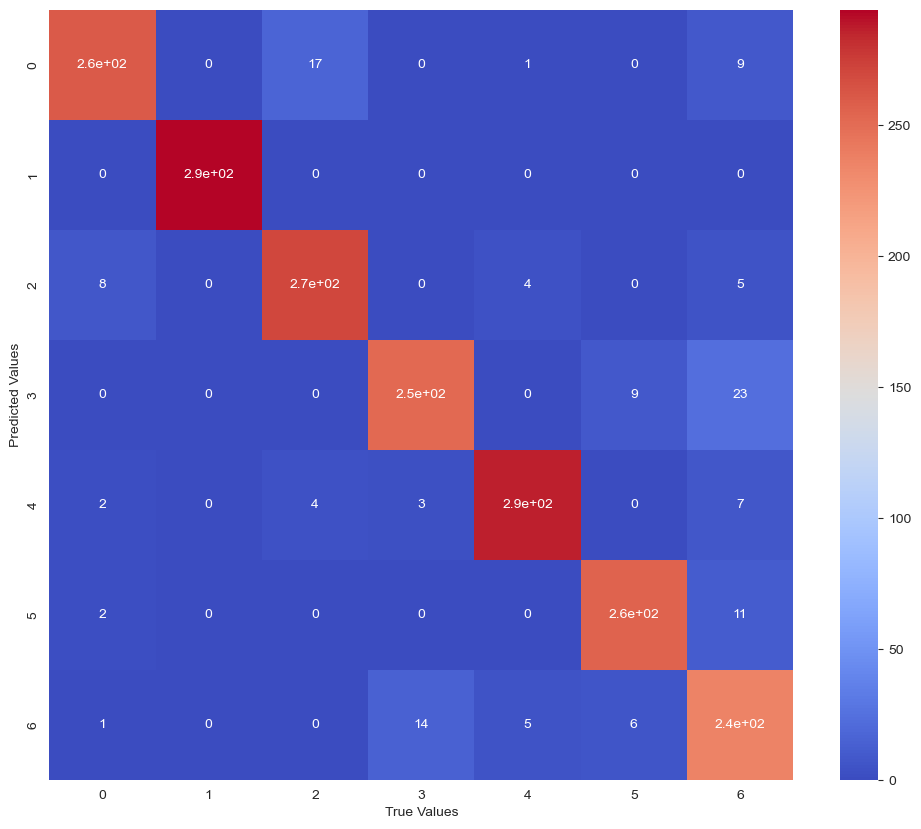

In [51]:
# Evaluating the model performance on the validation set
evaluate_val(model)

### LOGISTIC REGRESSION  FOR TEST SET (UNSCALED  DATA)

In [52]:
# Defining a function to assess the model (For Test set)
def evaluate_test(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    # To make predictions from model
    y_predict = model.predict(X_test)

    # Creating confusion metric of results
    cm = confusion_matrix(y_test, y_predict)

    # printing all results
    print(f"The Training set Accuracy of the Model is {model.score(X_train, y_train)}")
    print(f"The Testing set Accuracy of the Model is {model.score(X_test, y_test)}")
    print(f"The Model classification report is {classification_report(y_test,y_predict)}")

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, cmap="coolwarm")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

The Training set Accuracy of the Model is 0.9317329752112361
The Testing set Accuracy of the Model is 0.9317220543806647
The Model classification report is               precision    recall  f1-score   support

    BARBUNYA       0.95      0.90      0.92       717
      BOMBAY       1.00      1.00      1.00       715
        CALI       0.93      0.94      0.94       727
    DERMASON       0.92      0.87      0.90       715
       HOROZ       0.97      0.94      0.95       703
       SEKER       0.96      0.96      0.96       691
        SIRA       0.81      0.91      0.86       697

    accuracy                           0.93      4965
   macro avg       0.93      0.93      0.93      4965
weighted avg       0.93      0.93      0.93      4965



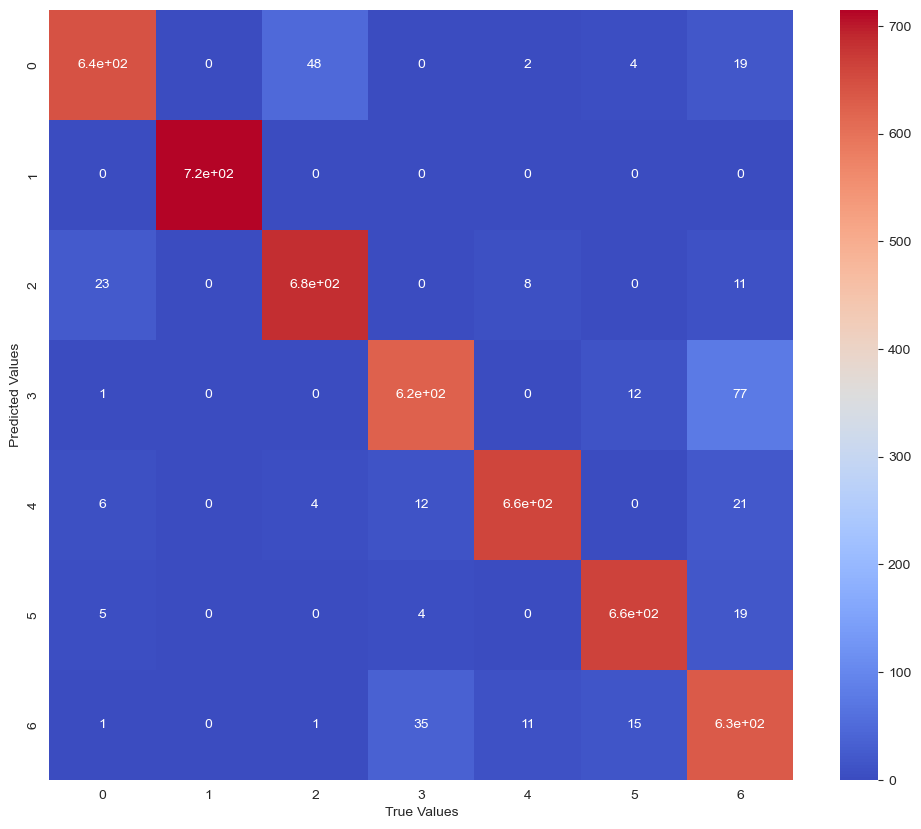

In [53]:
# Evaluating the model performance on the test set
evaluate_test(model)

### RANDOM FOREST CLASSIFIER  FOR VALIDATION SET (UNSCALED  DATA)

### Hyperparameter Tuning

In [54]:
# Using GridSearchCV to carryout the hyperparameter tuning for RFC parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

# Create a Random Forest classifier object
rfc = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object to search for the best parameters
grid = GridSearchCV(rfc, params, n_jobs=-1, cv=3)

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best parameters and its result
best_params = grid.best_params_
best_score = grid.cv_results_['mean_test_score'][grid.best_index_]
print("* Best parameters: ", best_params)
print("  Accuracy: ", best_score)
print("  F1-score: ", f1_score(y_test, grid.predict(X_test), average='weighted'))

# Print the accuracy and F1-score for each parameter combination
print("\nResults:")
for i, score in enumerate(grid.cv_results_['mean_test_score']):
    if grid.cv_results_['params'][i] == best_params:
        continue
    print(f"Params: {grid.cv_results_['params'][i]} \nAccuracy: {score} \nF1-score: {f1_score(y_test, grid.predict(X_test), average='weighted')}\n")


* Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
  Accuracy:  0.9501986458508198
  F1-score:  0.9521460830720172

Results:
Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50} 
Accuracy: 0.9493033406076884 
F1-score: 0.9521460830720172

Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} 
Accuracy: 0.9499748195400369 
F1-score: 0.9521460830720172

Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50} 
Accuracy: 0.9493592971853841 
F1-score: 0.9521460830720172

Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100} 
Accuracy: 0.9484080353645571 
F1-score: 0.9521460830720172

Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200} 
Accuracy: 0.9484639919422527 
F1-score: 0.9521460830720172

Params: {'max_depth': None, 'min_sa

In [55]:
# To feed the training data to the model.
model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

The Training set Accuracy of the Model is 1.0
The Validation set Accuracy of the Model is 0.9506545820745217
The Model classification report is               precision    recall  f1-score   support

    BARBUNYA       0.96      0.97      0.96       287
      BOMBAY       1.00      1.00      1.00       294
        CALI       0.96      0.95      0.96       288
    DERMASON       0.91      0.92      0.92       284
       HOROZ       0.96      0.96      0.96       302
       SEKER       0.96      0.98      0.97       269
        SIRA       0.89      0.87      0.88       262

    accuracy                           0.95      1986
   macro avg       0.95      0.95      0.95      1986
weighted avg       0.95      0.95      0.95      1986



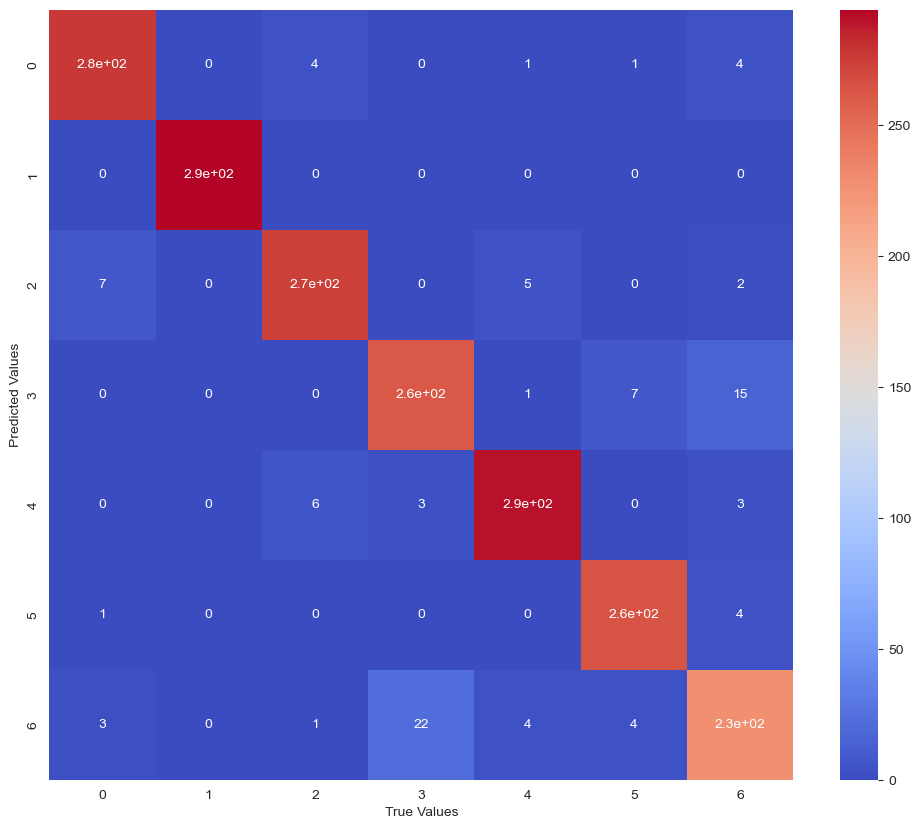

In [56]:
# Evaluating the model performance on the Validation set
evaluate_val(model)